# **Análise de Roubos e Furtos de Celulares no Rio de Janeiro entre 01/2014 e 09/2024**

Nos últimos anos, moradores do Rio de Janeiro têm relatado uma percepção de aumento da violência na capital, somada à sensação de impunidade em relação aos violadores da lei. Como consequência, alguns moradores chegaram até mesmo a se organizar em grupos de "justiceiros", buscando fazer justiça com as próprias mãos.

Este repositório contém uma análise exploratória de dados sobre roubos e furtos de celulares no município do Rio de Janeiro. A análise por bairros será feita através das Unidades territoriais, com base no CISP (número da circunscrição onde ocorreu o fato). A fonte dos dados é o [Instituto de Segurança Pública do Rio de Janeiro](http://www.ispdados.rj.gov.br/estatistica.html).

**Objetivos da Análise:**

* Identificar a tendência de roubos e furtos ao longo dos anos.
* Determinar quais bairros possuem o maior número de ocorrências de roubos e furtos.
* Analisar os meses com maior incidência de roubos e furtos.


In [11]:
# Importando os pacotes
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

In [12]:
# Importando os dados
df_delegacias = pd.read_csv('/kaggle/input/crimes-rj/delegacias.csv', sep=';', encoding='iso-8859-1')
df_furtos_roubos = pd.read_csv('/kaggle/input/crimes-rj/roubos_furtos.csv', sep=';', encoding='iso-8859-1')

In [13]:
# Padronizando as colunas para minúsculas
df_furtos_roubos.columns = df_furtos_roubos.columns.str.lower()
df_delegacias.columns = df_delegacias.columns.str.lower()

In [14]:
# Filtrando os dados de furtos e roubos para o município do Rio de Janeiro
df_furtos_roubos_rio = df_furtos_roubos[df_furtos_roubos['munic'] == 'Rio de Janeiro']

# Filtrando os dados das delegacias para o município do Rio de Janeiro
df_delegacias_rio = df_delegacias[df_delegacias['município'] == 'Rio de Janeiro']

# Realizando o merge entre os DataFrames
df_completo = pd.merge(df_furtos_roubos_rio, df_delegacias_rio, on='cisp', how='left')

# Selecionando as colunas desejadas
df_final = df_completo[['mes', 'ano', 'munic', 'roubo_celular', 'furto_celular', 'unidade territorial']]

In [15]:
# Criando a coluna 'data' com formato 'YYYY-MM'
df_final['data'] = pd.to_datetime(df_final['ano'].astype(str) + '-' + df_final['mes'].astype(str), format='%Y-%m')

# Filtrando os dados entre janeiro de 2014 e setembro de 2024
start_date = '2014-01'
end_date = '2024-09'
df_final = df_final[(df_final['data'] >= start_date) & (df_final['data'] <= end_date)]

/tmp/ipykernel_30/2933124198.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['data'] = pd.to_datetime(df_final['ano'].astype(str) + '-' + df_final['mes'].astype(str), format='%Y-%m')


In [16]:
# Verificando a quantidade de valores ausentes por coluna
df_final.isnull().sum()

# Remover as linhas onde não há 'unidade territorial' 
df_final = df_final.dropna(subset=['unidade territorial'])

In [17]:
# Estatísticas descritivas das colunas numéricas
df_final[['roubo_celular', 'furto_celular']].describe()

,roubo_celular,furto_celular
count,5289.000000,5289.000000
mean,21.433541,29.581017
std,17.236140,41.361204
min,0.000000,0.000000
25%,10.000000,10.000000
50%,17.000000,18.000000
75%,29.000000,34.000000
max,201.000000,1008.000000


# Tendência de roubos e furtos ao longo dos anos.

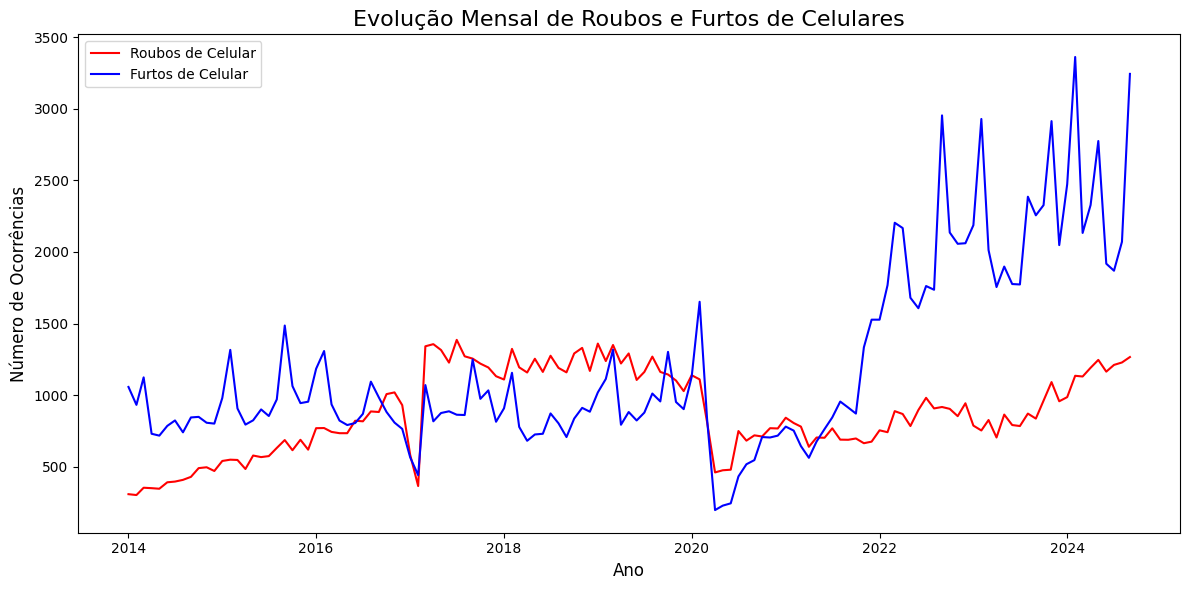

In [33]:
# Agrupando os dados por mês e somando os valores de roubos e furtos de celular 
df_monthly = df_final.groupby('data')[['roubo_celular', 'furto_celular']].sum().reset_index()

# Plotando a evolução mensal dos roubos e furtos
plt.figure(figsize=(12, 6))
plt.plot(df_monthly['data'], df_monthly['roubo_celular'], label='Roubos de Celular', color='red', linestyle='-')
plt.plot(df_monthly['data'], df_monthly['furto_celular'], label='Furtos de Celular', color='blue', linestyle='-')
plt.title('Evolução Mensal de Roubos e Furtos de Celulares', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Número de Ocorrências', fontsize=12)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.legend()
plt.tight_layout()
plt.show()

# Análise dos bairros com mais registros de roubos e furtos.

In [23]:
# Média de roubos por Unidade territorial
df_roubos_bairros = df_final.groupby('unidade territorial')['roubo_celular'].mean().reset_index()
df_roubos_bairros = df_roubos_bairros.sort_values(Orderby='roubo_celular', ascending=False)
df_roubos_bairros

,unidade territorial,roubo_celular
7,"Bangu, Gericinó, Padre Miguel e Senador Camará",53.007752
20,"Cavalcanti, Engenheiro Leal, Madureira, Turiaç...",45.581395
17,"Campo dos Afonsos, Deodoro, Jardim Sulacap, Ma...",42.147287
23,"Centro (parte), Lapa e Paquetá",37.968992
25,"Colégio (parte), Irajá, Vicente de Carvalho, V...",36.000000
9,"Benfica, Bonsucesso, Higienópolis, Manguinhos,...",34.255814
16,"Campo Grande, Cosmos, Inhoaíba, Santíssimo e S...",32.829457
34,"Maracanã, Praça da Bandeira e Tijuca (parte)",30.341085
1,"Acari, Barros Filho, Costa Barros, Parque Colú...",29.418605
5,"Anil, Cidade de Deus, Curicica, Gardênia Azul,...",27.798450


In [25]:
# Média de furtos por Unidade territorial
df_furtos_bairros = df_final.groupby('unidade territorial')['furto_celular'].mean().reset_index()
df_furtos_bairros = df_furtos_bairros.sort_values(by='furto_celular', ascending=False)
df_furtos_bairros

,unidade territorial,furto_celular
8,"Barra da Tijuca, Itanhangá, Joá",99.155039
23,"Centro (parte), Lapa e Paquetá",85.829457
27,Copacabana (parte) e Leme,72.565891
33,Ipanema e Leblon,66.000000
34,"Maracanã, Praça da Bandeira e Tijuca (parte)",58.550388
18,"Catete, Cosme Velho, Flamengo, Glória e Laranj...",57.643411
11,"Botafogo, Humaitá e Urca",56.503876
22,"Centro (parte), Gamboa, Santo Cristo e Saúde",56.434109
21,Centro (parte),45.434109
36,"Recreio dos Bandeirantes, Barra de Guaratiba, ...",42.201550




As regiões com maior incidência de roubos não lideram as estatísticas de furtos. Através dos dados observados, podemos interpretar que as regiões que lideram as estatísticas de furtos possuem como características em comum a proximidade de praias muito frequentadas (Barra da Tijuca, Copacabana, Ipanema e Leblon) e bairros com grandes blocos de carnaval. Enquanto as regiões com mais registros de roubos estão localizadas no subúrbio.




# Análise dos meses com mais registros de roubos e furtos.

In [24]:
# Médias de roubos e furtos de celulares por mês
df_monthly_mean = df_final.groupby('mes')[['roubo_celular', 'furto_celular']].mean().reset_index()

# Mapeando os números dos meses para os nomes dos meses
df_monthly_mean['mes'] = df_monthly_mean['mes'].map({
    1: 'Janeiro', 2: 'Fevereiro', 3: 'Março', 4: 'Abril', 5: 'Maio', 6: 'Junho',
    7: 'Julho', 8: 'Agosto', 9: 'Setembro', 10: 'Outubro', 11: 'Novembro', 12: 'Dezembro'
})

print("Média de roubos de celulares por mês:")
print(df_monthly_mean[['mes', 'roubo_celular']].to_string(index=False))

print("\nMédia de furtos de celulares por mês:")
print(df_monthly_mean[['mes', 'furto_celular']].to_string(index=False))

Média de roubos de celulares por mês:
      mes  roubo_celular
  Janeiro      20.345898
Fevereiro      20.157428
    Março      22.090909
    Abril      20.321508
     Maio      21.266075
    Junho      20.634146
    Julho      22.401330
   Agosto      22.243902
 Setembro      22.170732
  Outubro      22.051220
 Novembro      22.451220
 Dezembro      21.195122

Média de furtos de celulares por mês:
      mes  furto_celular
  Janeiro      30.616408
Fevereiro      37.093126
    Março      30.949002
    Abril      25.822616
     Maio      26.764967
    Junho      24.917960
    Julho      26.250554
   Agosto      29.144124
 Setembro      35.784922
  Outubro      29.136585
 Novembro      30.400000
 Dezembro      27.980488


In [31]:
# 3 meses com maiores médias de roubos e furtos

# Ordenando as médias de roubos e furtos em ordem decrescente
df_monthly_sorted_roubo = df_monthly_mean.sort_values(by='roubo_celular', ascending=False)
df_monthly_sorted_furto = df_monthly_mean.sort_values(by='furto_celular', ascending=False)


print("3 meses com maiores médias de roubos de celulares:")
print(df_monthly_sorted_roubo[['mes', 'roubo_celular']].head(3).to_string(index=False))

print("\n3 meses com maiores médias de furtos de celulares:")
print(df_monthly_sorted_furto[['mes', 'furto_celular']].head(3).to_string(index=False))

3 meses com maiores médias de roubos de celulares:
     mes  roubo_celular
Novembro      22.451220
   Julho      22.401330
  Agosto      22.243902

3 meses com maiores médias de furtos de celulares:
      mes  furto_celular
Fevereiro      37.093126
 Setembro      35.784922
    Março      30.949002


Aqui podemos observar que os meses com maior incidência de furtos coincidem com grandes eventos no município. Nos meses de Fevereiro e Março temos o Carnaval como principal evento da cidade, enquanto em Setembro ocorre a cada 2 anos o Rock In Rio. Já as estatísticas de roubo são mais constantes e não demonstram sazonalidade.